# Multilayer Perceptron MNIST

## Imports

In [0]:
%matplotlib inline

import warnings
import random
import pprint

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.datasets.base import get_data_home 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Baixando e configurando o dataset

In [2]:
#Ignorando os warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Baixando MNIST data')
mnist_dataset = fetch_mldata('MNIST original')
print('Download concluído.')

data = mnist_dataset.data
target = mnist_dataset.target
#mages = mnist_dataset.images

tamanho_dataset_teste = 0.2

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=tamanho_dataset_teste, random_state=42)

print(f"Training dataset size: {len(data_train)}")
print(f"Test dataset size: {len(target_train)}")


Baixando MNIST data
Download concluído.
Training dataset size: 56000
Test dataset size: 56000


Alguns números do dataset:

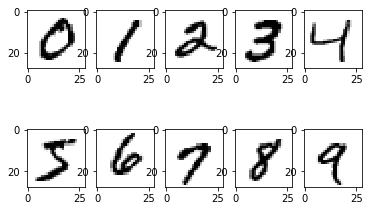

In [3]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(target == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

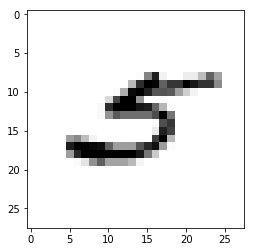

In [4]:
fig, ax = plt.subplots(1)
im_idx = 34567
plottable_image = np.reshape(data[im_idx], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')

In [5]:
for index, value in enumerate(data[im_idx]):
    if index % 28 == 0: print("\n")
    print("{0:0=3d} ".format(value), end="")




000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 003 124 221 013 000 000 018 01

In [0]:
classificador_MLP = MLPClassifier(hidden_layer_sizes=(64,128,64,10), verbose=True, alpha=0.0001, tol=1e-4)

print("Fitting model")
classificador_MLP.fit(data_train,target_train)
print("Fitting model ended")

Fitting model
Iteration 1, loss = 2.59843244
Iteration 2, loss = 2.31565664
Iteration 3, loss = 2.09191646
Iteration 4, loss = 1.40059202
Iteration 5, loss = 0.92593712
Iteration 6, loss = 0.48504171
Iteration 7, loss = 0.26895375
Iteration 8, loss = 0.20244221
Iteration 9, loss = 0.16356010
Iteration 10, loss = 0.14373921
Iteration 11, loss = 0.12493521
Iteration 12, loss = 0.10870026
Iteration 13, loss = 0.09455275
Iteration 14, loss = 0.09233529
Iteration 15, loss = 0.07610585
Iteration 16, loss = 0.06867435
Iteration 17, loss = 0.06595150
Iteration 18, loss = 0.06601659
Iteration 19, loss = 0.05911438
Iteration 20, loss = 0.05358297
Iteration 21, loss = 0.04818809
Iteration 22, loss = 0.04718102
Iteration 23, loss = 0.04764656
Iteration 24, loss = 0.04324433
Iteration 25, loss = 0.04431332
Iteration 26, loss = 0.04241945
Iteration 27, loss = 0.03614723
Iteration 28, loss = 0.03012304
Iteration 29, loss = 0.03470671
Iteration 30, loss = 0.03330592
Iteration 31, loss = 0.02548161
Ite

In [0]:
print("Começando testes")
predictions = classificador_MLP.predict(data_test)
print("Fim dos testes")

In [0]:
print(confusion_matrix(target_test,predictions))
cm = confusion_matrix(target_test,predictions)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [0]:
print("Training set score: %f" % classificador_MLP.score(data_train, target_train))
print("Test set score: %f" % classificador_MLP.score(data_test, target_test))